### Part 1
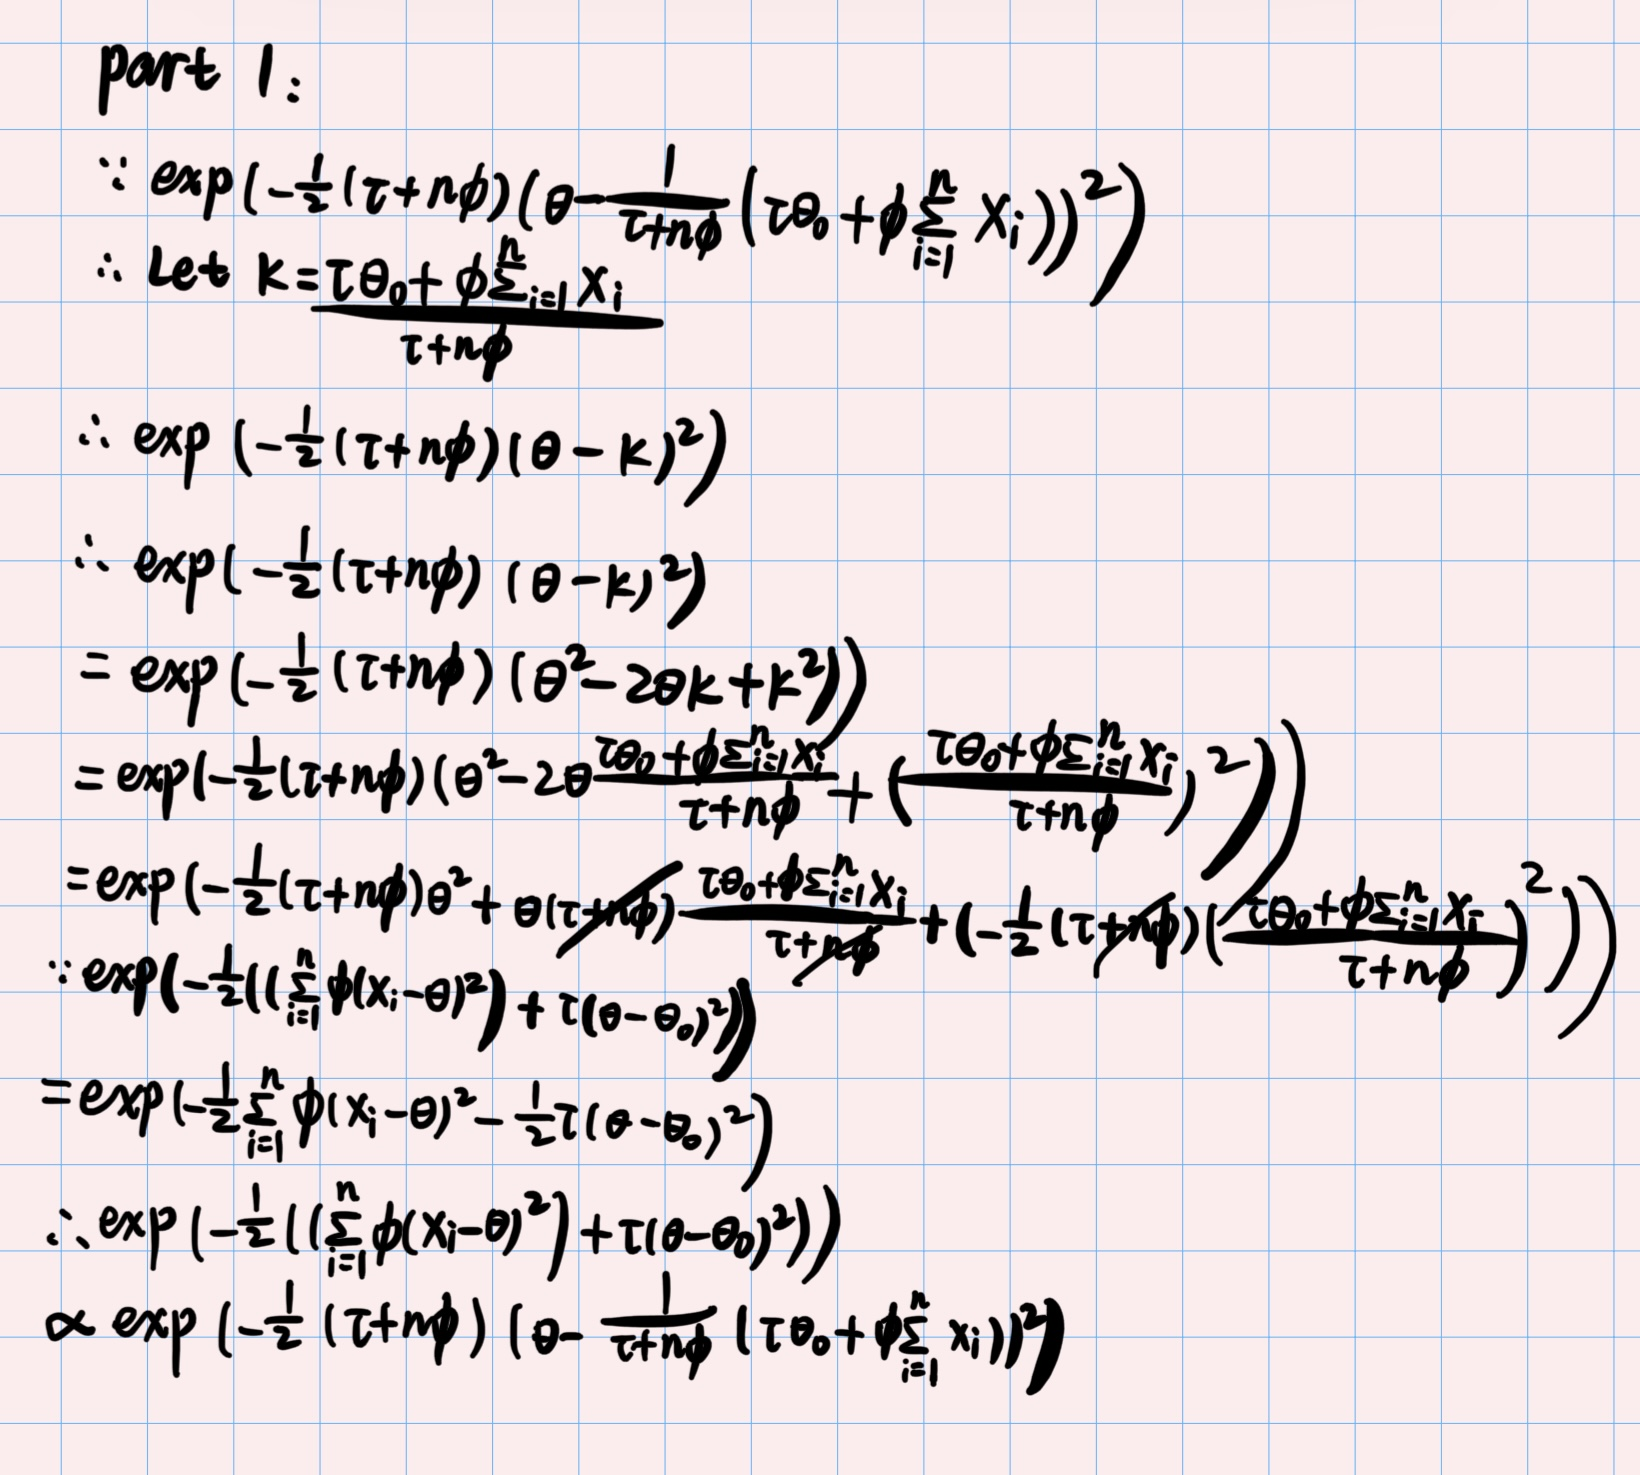

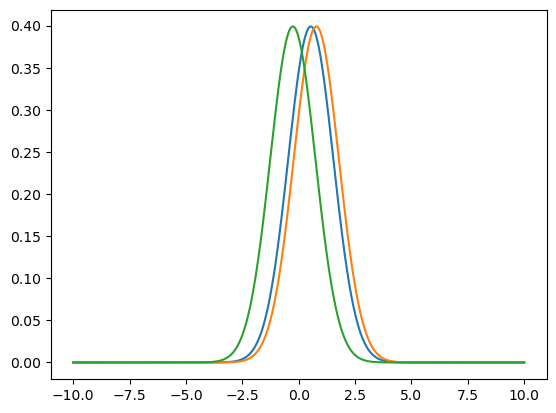

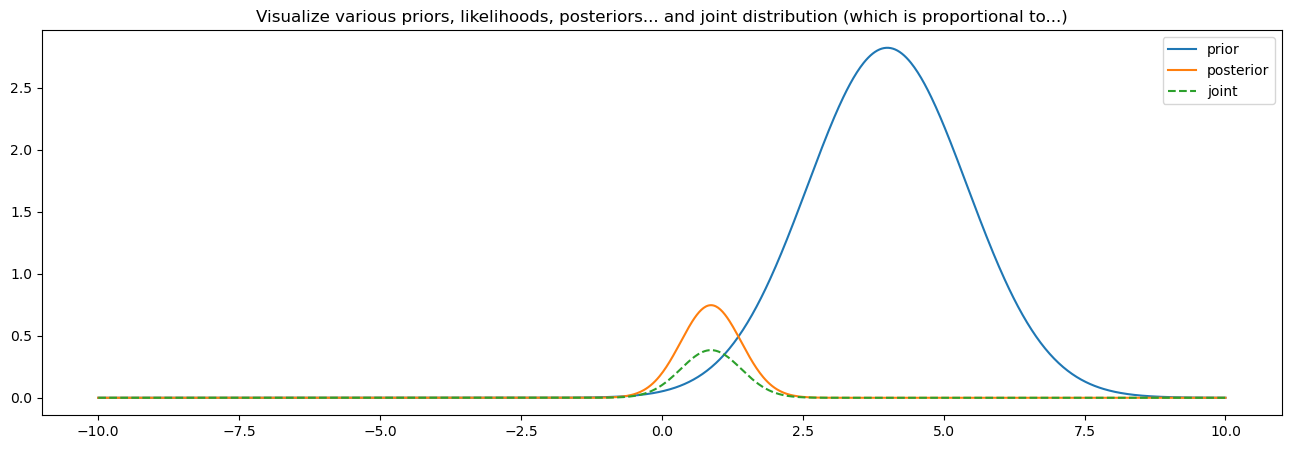

In [1]:
### Part 2
### 1
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

np.random.seed(672)
n = 3
x = stats.norm(loc=0, scale=1).rvs(n)
theta_0, tau = 4, 1/2
domain = np.linspace(-10, 10, 1001)

likelihood = [stats.norm.pdf(domain, loc=xi, scale=1) for xi in x]
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(domain) 
likelihoods = np.prod(likelihood, axis=0)
joint = 500 * likelihoods * prior
posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).pdf(domain)

for i, likelihood in enumerate(likelihood):
    plt.plot(domain, likelihood, label="likelihood")

plt.figure(figsize=(16, 5))
plt.plot(domain, 10*prior, label="prior")
plt.plot(domain, posterior, label="posterior")
plt.plot(domain, joint, linestyle="--", label="joint")
plt.legend()
plt.title("Visualize various priors, likelihoods, posteriors... and joint distribution (which is proportional to...)")
plt.show()

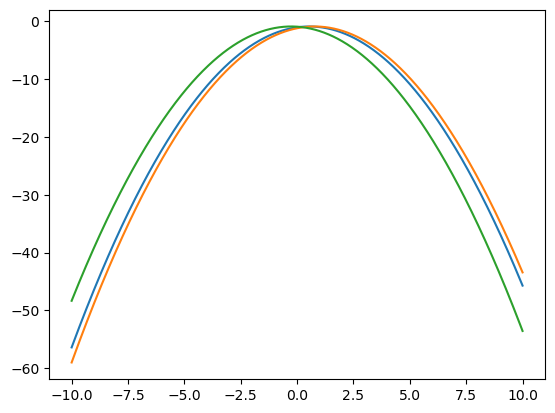

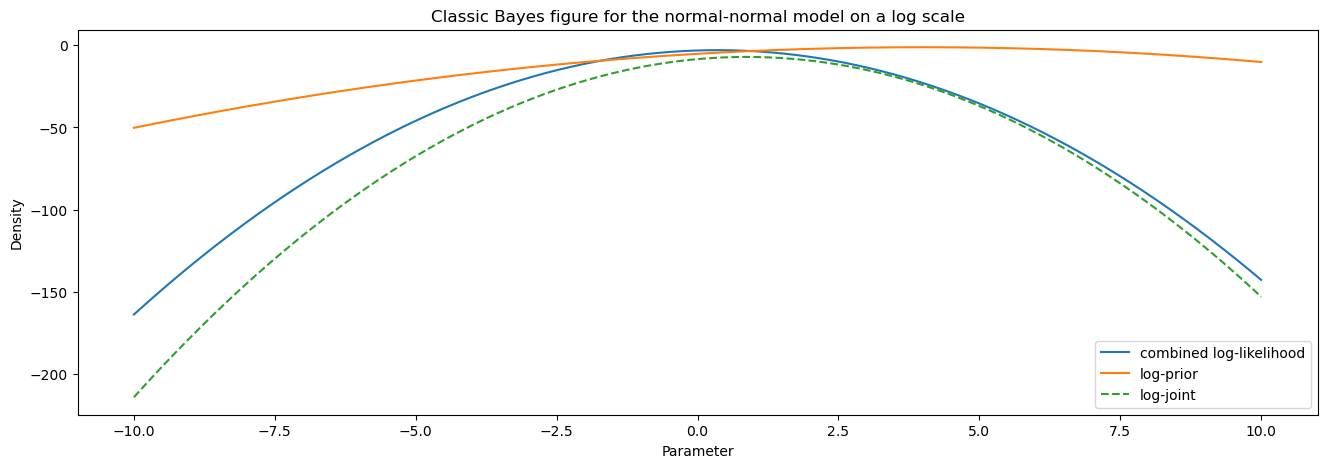

In [46]:
### 2
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

n = 3  
theta_0, tau = 4, 1/2  
domain = np.linspace(-10, 10, 1001)

logl = np.array([stats.norm.logpdf(domain, loc=xi, scale=1/p**0.5) for xi in x])
combined = logl.sum(axis=0)
logp = stats.norm.logpdf(domain, loc=theta_0, scale=1/tau**0.5)
logj = combined + logp

for i, logl in enumerate(logl):
    plt.plot(domain, logl, label="log-likelihood")

plt.figure(figsize=(16, 5))
plt.plot(domain, combined, label="combined log-likelihood")
plt.plot(domain, logp, label="log-prior")
plt.plot(domain, logj, linestyle='--', label="log-joint")
plt.legend()
plt.title("Classic Bayes figure for the normal-normal model on a log scale")
plt.xlabel("Parameter")
plt.ylabel("Density")
plt.show()


### 3
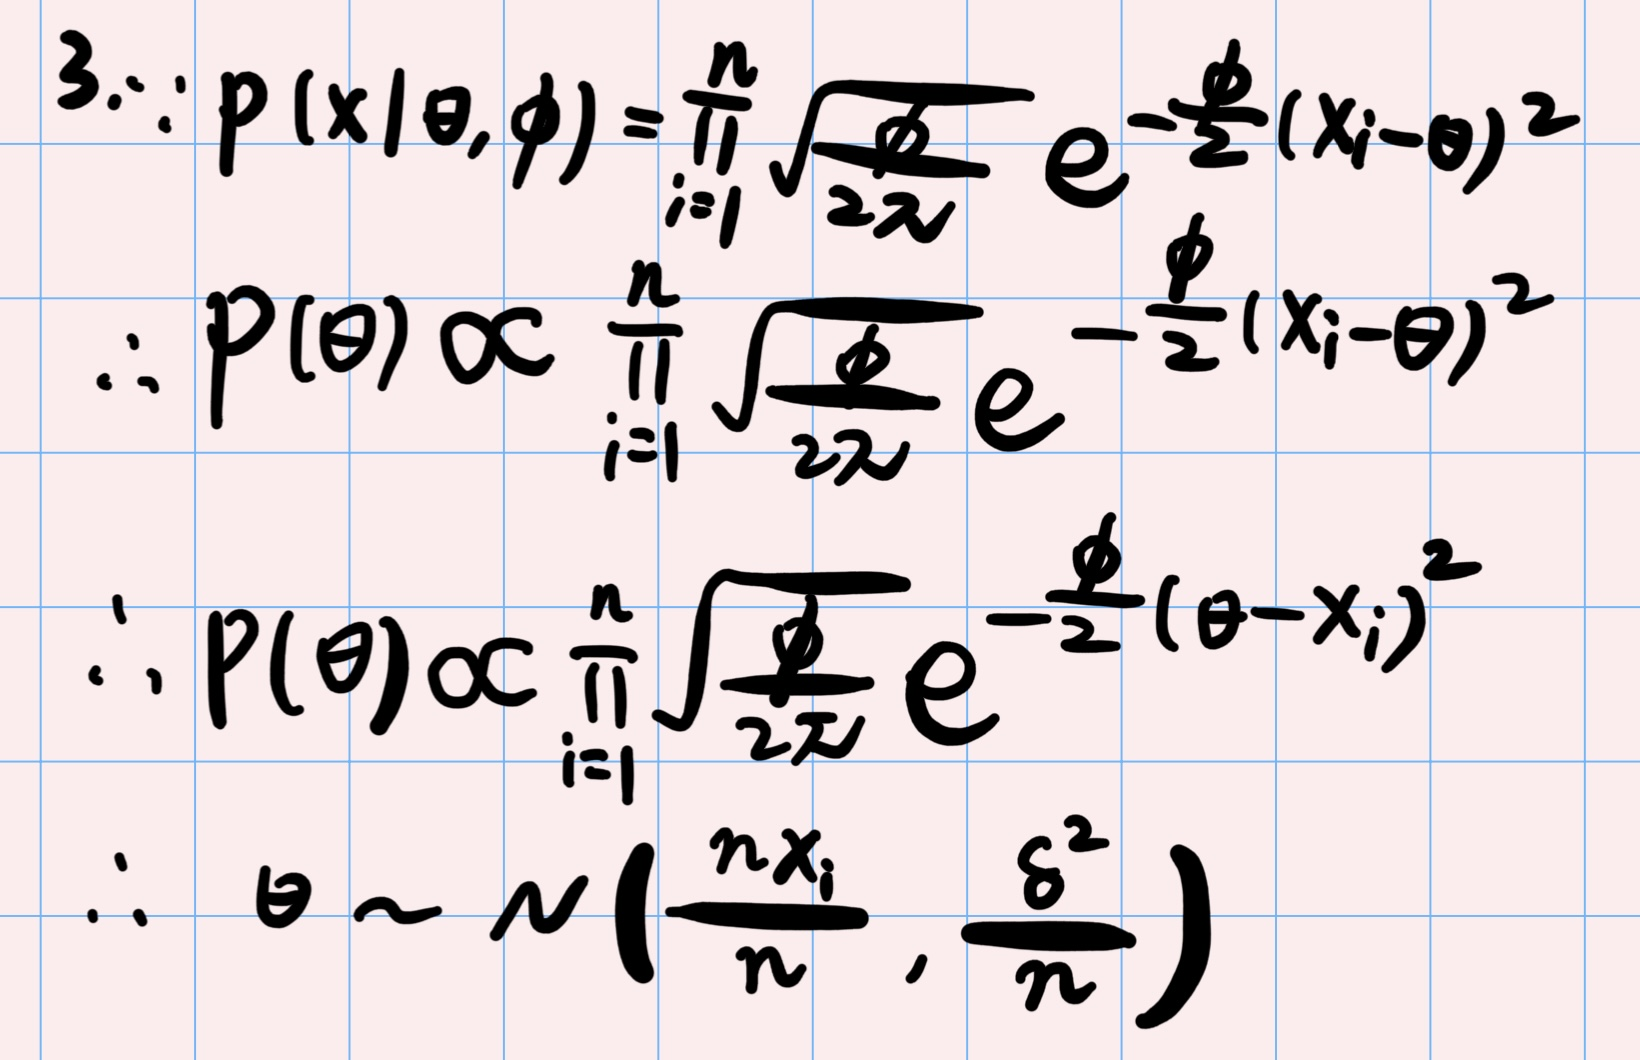